<a href="https://colab.research.google.com/github/fatemeh-sh264/Hyperparameter-Tuning-on-Classification-Algorithm/blob/main/Naive_Bayes_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Naive Bayes classifiers with hypertuning

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [3]:
# load dataset
x, y = load_iris(return_X_y=True)

In [4]:
# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [5]:
# Standardize your data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
# Naive Bayes to train our model 
model = GaussianNB()
# Hyper parameters range intialization for tuning
var_smoothing= np.logspace(0,-9, num=100)
# define grid search
grid = dict(var_smoothing=var_smoothing)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search.fit(x_train, y_train)
model = model.set_params(**grid_search.best_params_)
# train the model
model.fit(x_train, y_train)
# best hyperparameters 
print('best_params:', grid_search.best_params_)
# best model score
print('best_score:', grid_search.best_score_)

best_params: {'var_smoothing': 0.01519911082952933}
best_score: 0.9500000000000001


In [10]:
# test the model
test_preds = model.predict(x_test)
print(accuracy_score(y_test,test_preds))

0.9666666666666667


In [11]:
# confusion matrix
print(confusion_matrix(y_test, test_preds))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [12]:
# classification_report
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



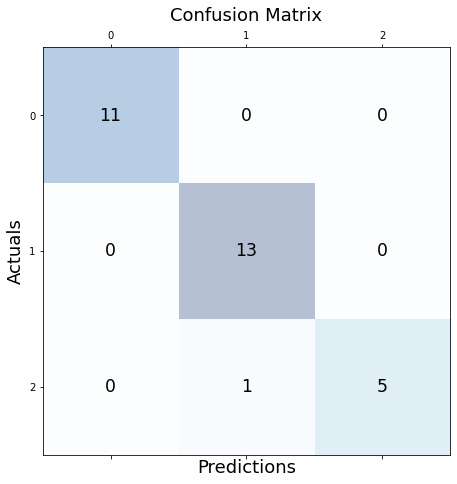

In [13]:
# confusion matrix plot
df_cm = confusion_matrix(y_test, test_preds)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(df_cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(df_cm.shape[0]):
    for j in range(df_cm.shape[1]):
        ax.text(x=j, y=i,s=df_cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
